<a href="https://colab.research.google.com/github/jinalssem/jinalssem/blob/main/8%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EC%85%98(%EC%8D%A8%EB%8B%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. 2023년 인구 분석
###2. 2023년과 2012년 인구 비교
###3. 2018~2023년 인구 변화

###1. 데이터 출처 : https://jumin.mois.go.kr/#
*   [201212_201212_연령별(1세,남여)인구현황_연간.csv](https://sen0956-my.sharepoint.com/:x:/g/personal/sunny_gangseo-th_sen_hs_kr/Ecl5DKf27MJEoraG3ofVyMQBeQiJ46RLQYNMj69MWy8OTA?e=12nbkO)
*   [201812_202312_연령별(10세,남여)인구현황_연간.csv](https://sen0956-my.sharepoint.com/:x:/g/personal/sunny_gangseo-th_sen_hs_kr/Eb9nFq1759RBjfM-OgkDZ98BzN2Kc7UDur5FBI2XBLoXRw?e=eGJvgJ)
*   [202312_202312_연령별(1세,남여)인구현황_연간.csv](https://sen0956-my.sharepoint.com/:x:/g/personal/sunny_gangseo-th_sen_hs_kr/EUYK9yR7xg5IpZrAQpCVNysBEhPdYukKaQAj48IMZZnPAA?e=LlswQI)
*   [south-korea.svg](https://sen0956-my.sharepoint.com/:u:/g/personal/sunny_gangseo-th_sen_hs_kr/ETcusGogmSVBjLVu7kA7aIkBA-uPPAN-wTtGlQgK9WUIMQ?e=uv55U6)

In [ ]:
!pip install koreanize-matplotlib    # Matplotlib에서 한글 폰트 지원
!pip install ipywidgets              #dropdown 라이브러리
!pip install imgkit
!apt-get install -y wkhtmltopdf
!pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas iio-sensor-proxy libavahi-core7 libavahi-glib1
  libdaemon0 libevdev2 libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0 libmbim-glib4 libmbim-proxy
  libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200 libnotify4 libnss-mdns libproxy1v5 libqmi-glib5
  libqmi-proxy libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5
  libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 li

In [ ]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import csv
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from bs4 import BeautifulSoup

In [ ]:
import os
import sys
from google.colab import output         #출력 화면 지우기
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

in_dir = '/content/drive/MyDrive/myPython/인구data'  # 데이터 업로드를 위한 폴더
sys.path.append(in_dir)       # path에 추가
os.chdir(in_dir)                  # change directory
os.getcwd()                      # pwd(현재 디렉터리)
!ls

Mounted at /content/drive
'201212_201212_연령별(1세,남여)인구현황_연간.csv'    Korea.svg	       인구현황.png
'201812_202312_연령별(10세,남여)인구현황_연간.csv'   south-korea.svg
'202312_202312_연령별(1세,남여)인구현황_연간.csv'    인구현황.html


Dropdown(description='지역 선택:', options=('전국', '강원', '경기', '경상남도', '경상북도', '광주', '대구', '대전', '부산', '서울', '세종', …

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
HTML file has been converted to 인구현황.png


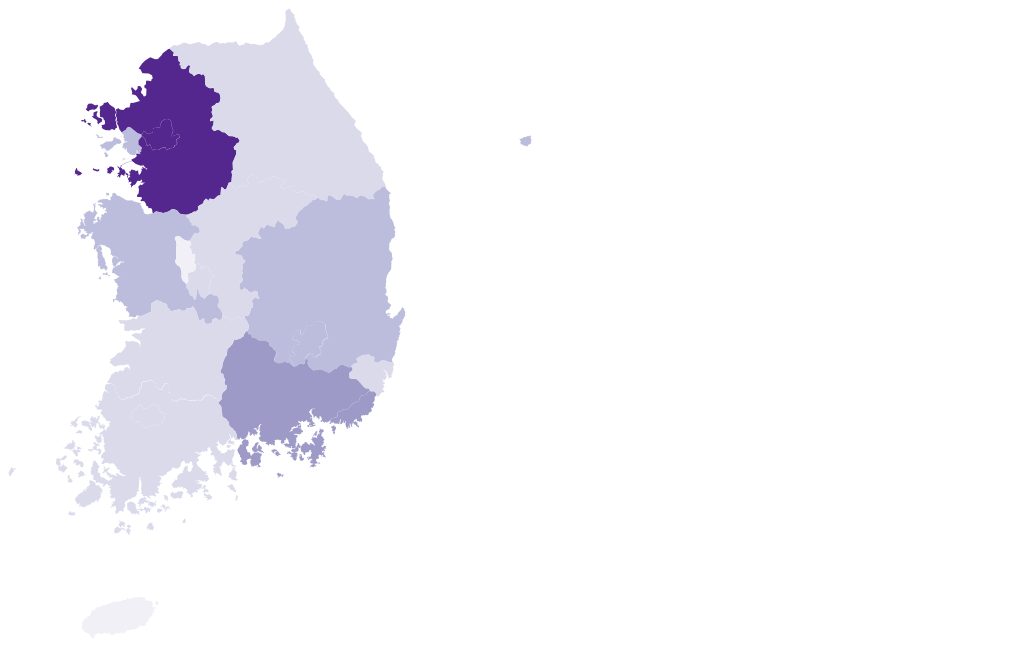

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 남녀 구분하여 나이별 자료 분석
def dataProcess(city, fname, m, enc):
    f=open(fname,mode=m,encoding=enc)
    data=csv.reader(f)
    header=next(data)
    # print(header[3],header[103],header[106],header[206])
    yy=fname[0:4]
    남자=[]
    여자=[]
    for row in data:
        if city in row[0].split()[0]:
            city=row[0].split()[0]
            for popu in range(3,104):
                남자.append(int(row[popu].replace(',','')))
                여자.append(int(row[popu+103].replace(',','')))
    showPlot(yy,city,남자,여자,"남자","여자")
    show_Pie(city, [sum(남자),sum(여자)],["남자","여자"],yy+"년 "+city+" 남녀 인구 비율")

# 2018~2023년 사이의 인구 변화
def dataProcess2(city,fname, m, enc):
    f=open(fname,mode=m,encoding=enc)
    data=csv.reader(f)
    header=next(data)
    yy=[]
    for col in range(1,len(header),26):
        yy.append(header[col][:4])
    # print(yy)
    # print(header[1],header[14],header[27],header[40],header[53],header[66],header[79],header[92],header[105],header[118],header[131],header[144])
    남자=[]
    여자=[]

    for row in data:
        if city in row[0].split()[0]:
            city=row[0].split()[0]
            for col in range(1,len(row),13):
                if col%2==1:
                    # print(int(row[col].replace(',','')))     #남자는 col이 홀수
                    남자.append(int(row[col].replace(',','')))
                else:
                    # print(int(row[col].replace(',','')))
                    여자.append(int(row[col].replace(',','')))

    showBar(city, yy,남자,여자)

# 2023년과 2012년 비교
def dataCompare(city,fname1,fname2, m, enc):
    f1=open(fname1,mode=m,encoding=enc)
    f2=open(fname2,mode=m,encoding=enc)
    data1=csv.reader(f1)
    data2=csv.reader(f2)
    header1=next(data1)
    header2=next(data2)
    # print(header1[3],header1[103],header1[106],header1[206])
    # print(header2[3],header2[103],header2[106],header2[206])
    yy1=fname1[0:4]  # 연도 수집
    yy2=fname2[0:4]  # 연도 수집
    year1=[]
    year2=[]

    for row in data1:
        if city in row[0].split()[0]:       # 전국  (0000000000)
            city=row[0].split()[0]
            for col in range(3,104):
                # row[col]: 남자 전체,  row[col+103]: 여자 전체
                year1.append(int(row[col].replace(',',''))+int(row[col+103].replace(',','')))
    for row in data2:
        if city in row[0].split()[0]:
            for col in range(3,104):
                # row[col]: 남자 전체,  row[col+103]: 여자 전체
                year2.append(int(row[col].replace(',',''))+int(row[col+103].replace(',','')))
    val=[x-y for x,y in zip(year1,year2)]
    # print(len(val))
    showPlot(yy1+" vs "+yy2, city, year1,year2,yy1+"년",yy2+"년")
    showCompareBar(yy1+" vs "+yy2, city, val,yy2+"년 - "+yy1+"년")

# 연령별 남녀 인구현황
def showPlot(year,city,val1,val2,val1_label,val2_label):
    fig, ax = plt.subplots(figsize=(10,3))
    # plt.figure(figsize=(10,3))
    plt.style.use('ggplot')
    plt.plot(range(len(val1)),val1,"b",label=val1_label)
    plt.plot(range(len(val2)),val2,"r",label=val2_label)
    plt.legend()      #범례 표시
    #y축 값에 1000단위 콤마 표시
    # 현재 y축의 위치 값 가져오기
    current_values = ax.get_yticks()

    # y축 위치 설정
    ax.set_yticks(current_values)

    # 포맷된 y축 레이블 설정
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

    plt.xlabel("나이")
    plt.ylabel("인구")
    plt.title(str(year)+'년 '+city+'의 연령별 인구 수')
    plt.show()

# 비교 차트(증감을 +,-로 출력)
def showCompareBar(year,city,val,val_label):
    fig, ax = plt.subplots(figsize=(10,3))
    # plt.figure(figsize=(10,3))
    plt.style.use('ggplot')
    plt.bar(range(len(val)),val,color="blue",label=val_label)
    plt.legend()      #범례 표시
    #y축 값에 1000단위 콤마 표시
    # 현재 y축의 위치 값 가져오기
    current_values = ax.get_yticks()

    # y축 위치 설정
    ax.set_yticks(current_values)

    # 포맷된 y축 레이블 설정
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

    plt.xlabel("나이")
    plt.ylabel("인구")
    plt.title(val_label+' '+city+'의 연령별 인구 변화')
    plt.show()

#연령별 남녀 인구형황
def showBar(city, year,male,female):
    fig, ax = plt.subplots(figsize=(13,6))
    bar_width = 0.25
    index=np.arange(len(year))
    # print(index)
    # 각 연도별로 2가지 성별 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
    b1 = plt.bar(index, male, bar_width, alpha=0.4, color='blue', label='남자')
    b2 = plt.bar(index+bar_width, female, bar_width, alpha=0.4, color='red', label='여자')

    # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
    plt.xticks(np.arange(bar_width/2, len(year) + (bar_width/2), 1), year)

    # 막대 위에 숫자 넣는 부분
    for rect in b1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 10)

    for rect in b2:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height/1.1, '%d' % height, ha='center', va='bottom', size = 10)  # height/1.1: 막대 위쪽 90%에 값 표시

    # y축 1e6 변환 해제
    from matplotlib import ticker

    formatter = ticker.ScalarFormatter()
    formatter.set_scientific(False)
    ax.yaxis.set_major_formatter(formatter)

    # y축 값에 1000단위 콤마 표시
    # 현재 y축의 위치 값 가져오기
    current_values = ax.get_yticks()

    # y축 위치 설정
    ax.set_yticks(current_values)

    # 포맷된 y축 레이블 설정
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

    # x축, y축 이름 및 범례 설정
    plt.title(year[0]+"~"+year[-1]+"의 "+city+" 년도별 인구 변화")
    plt.xlabel('년도', size = 13)
    plt.ylabel('인구 수', size = 13)
    plt.legend()
    plt.show()

#Pie 차드에 값과 비율을 함께 표시
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n{absolute:,d} 명"

# Pie 차트 그리기
def show_Pie(city, 남녀,label,title):
    plt.figure(figsize=(5,5))
    #color=['#8fd9b6', '#d395d0']
    color=['#8fd9b6', '#FF9999']
    plt.axis('equal')     #동그란 정원
    #plt.pie(남녀, labels=label, autopct=/"%.1f%%", colors=color, startangle=90)     # startangle=90 시작 각도
    plt.pie(남녀, labels=label, autopct=lambda pct: func(pct, 남녀), colors=color, startangle=90)     # startangle=90 시작 각도
    plt.legend()          # 범례
    plt.title(title)
    #plt.savefig(title+".png")
    plt.show()

# DropDown 핸들러
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        output.clear()      # Python 출력 내용 지우기
        display(dropdown)   # dropdown 다시 표시
        print(f"선택된 지역: {change['new']}")
        dataProcess(change['new'],'202312_202312_연령별(1세,남여)인구현황_연간.csv', 'r', 'cp949')
        dataProcess(change['new'],'201212_201212_연령별(1세,남여)인구현황_연간.csv', 'r', 'cp949')
        dataCompare(change['new'],'202312_202312_연령별(1세,남여)인구현황_연간.csv','201212_201212_연령별(1세,남여)인구현황_연간.csv', 'r', 'cp949')
        dataProcess2(change['new'],'201812_202312_연령별(10세,남여)인구현황_연간.csv', 'r', 'cp949')

#지도 위에 색상으로 표시
def drawMap(fname,m,code,city):
    fd=open(fname,mode=m,encoding=code)
    data=csv.reader(fd,delimiter=",")
    datadict={}
    header=next(data)
    #print(header[1],header[104])
    next(data)      # 전국 skip
    for row in data:
        for 도시 in city:
            if 도시 in row[0].split()[0]:
                datadict[도시]=int(row[1].replace(',',''))+int(row[104].replace(',','')) #2023년_남_총인구수+2023년_여_총인구수

    # 지도에 농도별로 표시하기
    #http://colorbrewer2.org/에 방문하여 6단계 색상 값을 가지고 온다.
    colors=['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']

    svg=open('south-korea.svg','r').read()
    # Check if the document is XML and parse accordingly
    if '<?xml' in svg:
        soup = BeautifulSoup(svg, 'lxml-xml')
    else:
        soup = BeautifulSoup(svg, 'html.parser')
    # soup=BeautifulSoup(svg,'html.parser')
    paths=soup.findAll('path')

    for p in paths:
        # print(p['id'])
        val=datadict[p['id']]
        if val<1000000:
            grade=0
        elif val<2000000:
            grade=1
        elif val<3000000:
            grade=2
        elif val<6000000:
            grade=3
        elif val<8000000:
            grade=4
        else:
            grade=5
        p['fill']=colors[grade]
        # print(p['id'],p['fill'])
        # print(soup)

    f=open('인구현황.html','w')
    f.write(soup.prettify())
    f.close()

    #import urllib.request
    #a = urllib.request.urlopen("인구현황.html")


#HTML을 이미지로 저장하고 다운로드 받기
def html2img():
    import imgkit

    os.environ['XDG_RUNTIME_DIR'] = in_dir
    # Path to the HTML file
    html_file = '인구현황.html'

    # Path to save the PNG image
    output_path = '인구현황.png'

    # Convert HTML file to PNG
    imgkit.from_file(html_file, output_path)

    print(f"HTML file has been converted to {output_path}")
    from google.colab import files
    from IPython.display import display, Image

    # Display the image in the notebook
    display(Image('인구현황.png'))

    # Download the image file to your local computer
    files.download('인구현황.png')



# main 프로그램
if __name__ == '__main__':
    # 드롭다운 목록 생성
    dropdown = widgets.Dropdown(
    options=['전국','강원', '경기', '경상남도', '경상북도', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전라남도', '전라북도', '제주', '충청남도', '충청북도'],
    value="전국",  # 기본값
    description='지역 선택:',
    disabled=False,
    )

    # 드롭다운 변경 이벤트 핸들러 설정
    dropdown.observe(on_change)

    # 드롭다운 표시
    display(dropdown)

    # 지도에 표시
    city=['전국','강원', '경기', '경상남도', '경상북도', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전라남도', '전라북도', '제주', '충청남도', '충청북도']
    drawMap('202312_202312_연령별(1세,남여)인구현황_연간.csv','r','cp949',city)
    html2img()          # HTML 파일을 이미지 파일로 변환